In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from dopnet_loader import DopNetLoader

In [8]:
# Load data
DATA_PATH = "../DATA/raw_mat/Training Data"
loader = DopNetLoader(DATA_PATH)
data = loader.load_normalized(target_shape=(256, 256))

Found 6 .mat files

=== SUMMARY ===
Person: A:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 64 samples
  Gesture 3: 105 samples
Person: B:
  Gesture 0: 112 samples
  Gesture 1: 116 samples
  Gesture 2: 72 samples
  Gesture 3: 105 samples
Person: C:
  Gesture 0: 85 samples
  Gesture 1: 132 samples
  Gesture 2: 80 samples
  Gesture 3: 137 samples
Person: D:
  Gesture 0: 70 samples
  Gesture 1: 112 samples
  Gesture 2: 71 samples
  Gesture 3: 93 samples
Person: E:
  Gesture 0: 56 samples
  Gesture 1: 98 samples
  Gesture 2: 91 samples
  Gesture 3: 144 samples
Person: F:
  Gesture 0: 87 samples
  Gesture 1: 140 samples
  Gesture 2: 101 samples
  Gesture 3: 208 samples


In [9]:
# Data structure check
GESTURE_NAMES = ['Wave', 'Pinch', 'Swipe', 'Click']
person = list(data.keys())[0]

gestures = data[person]

print(f'Person: {person}')
print(f'Gesture count: {len(gestures)}')
for i in range(4):
    print(f'Number of repetitions for a gesture "{GESTURE_NAMES[i]}": {len(gestures[i])}')

example = gestures[0][0]
print('Shape of example spectrogram:', example.shape)


Person: A
Gesture count: 4
Number of repetitions for a gesture "Wave": 56
Number of repetitions for a gesture "Pinch": 98
Number of repetitions for a gesture "Swipe": 64
Number of repetitions for a gesture "Click": 105
Shape of example spectrogram: (256, 256)


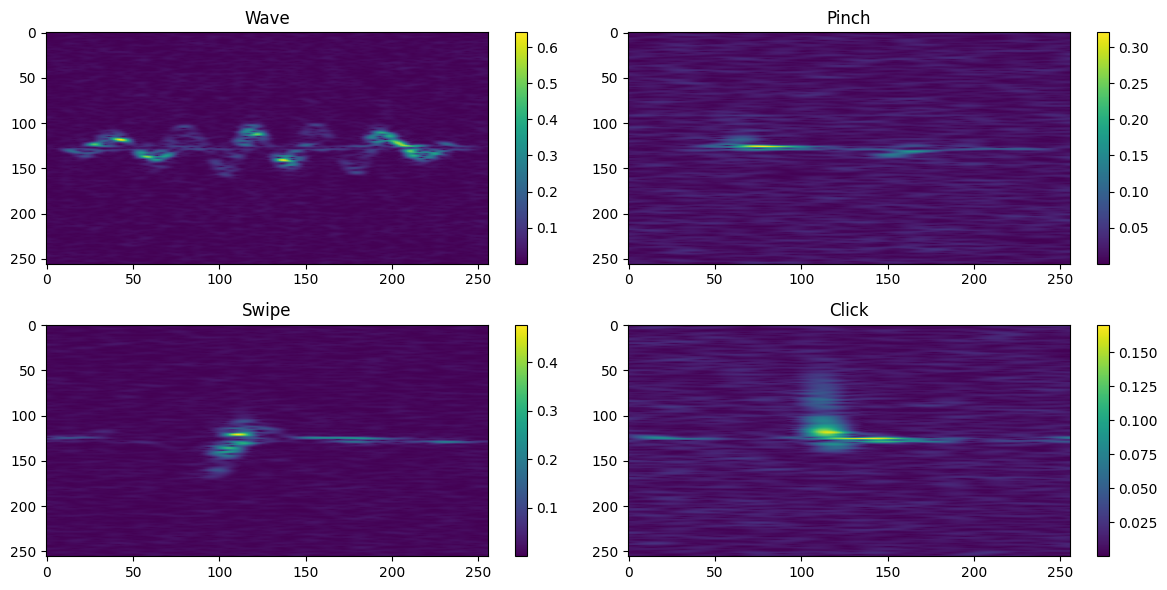

In [10]:
# Spectrogram visualization
plt.figure(figsize=(12,6))

for i in range(4):
    spec = np.abs(gestures[i][15])

    plt.subplot(2, 2, i+1)
    plt.imshow(spec, aspect="auto", cmap="viridis")
    plt.title(f"{GESTURE_NAMES[i]}")
    plt.colorbar()

plt.tight_layout()
plt.show()


In [11]:
# Features extraction
X, y = loader.to_feature_matrix(mode="magnitude")

print("Feature matrix:", X.shape)
print("Labels:", y[20:])


Feature matrix: (2433, 65536)
Labels: ['Wave' 'Wave' 'Wave' ... 'Click' 'Click' 'Click']


In [ ]:
# Baseline SVM
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Classification Report ===
              precision    recall  f1-score   support

       Click       0.93      0.86      0.90       198
       Pinch       0.84      0.94      0.89       174
       Swipe       0.97      0.93      0.94       120
        Wave       0.93      0.93      0.93       117

    accuracy                           0.91       609
   macro avg       0.92      0.91      0.91       609
weighted avg       0.91      0.91      0.91       609

